In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import librosa
import os
import math
import shutil
import pandas as pd

2025-04-18 02:15:22.567951: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744942522.773242      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744942522.840254      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# folder_path = '/kaggle/working/audio'

# # Kiểm tra xem thư mục có tồn tại không trước khi xóa
# if os.path.exists(folder_path):
#     shutil.rmtree(folder_path)
#     print(f"Đã xóa thư mục {folder_path}")
# else:
#     print(f"Thư mục {folder_path} không tồn tại")

# # Kiểm tra kết quả
# print("Thư mục sau khi xóa:", os.listdir('/kaggle/working'))

In [2]:
import os
import shutil

# Định nghĩa đường dẫn nguồn và đích
source_dir = '/kaggle/input/asvspoof2021-df-audio-dataset/DF_audio'
destination_dir = '/kaggle/working'

# Tạo thư mục đích nếu chưa tồn tại
os.makedirs(destination_dir, exist_ok=True)

# Hàm sao chép toàn bộ cây thư mục
def copy_directory_tree(src, dst):
    for root, dirs, files in os.walk(src):
        rel_path = os.path.relpath(root, src)
        dest_dir = os.path.join(dst, rel_path)
        os.makedirs(dest_dir, exist_ok=True)
        for file in files:
            src_file = os.path.join(root, file)
            dest_file = os.path.join(dest_dir, file)
            shutil.copy2(src_file, dest_file)

# Sao chép nội dung
copy_directory_tree(source_dir, destination_dir)

In [3]:
import os

# Định nghĩa đường dẫn thư mục cũ và mới
old_folder = '/kaggle/working/bonafide'
new_folder = '/kaggle/working/0'
_old_folder = '/kaggle/working/spoofed'
_new_folder = '/kaggle/working/1'
# Đổi tên thư mục
os.rename(old_folder, new_folder)
os.rename(_old_folder, _new_folder)

# Kiểm tra xem thư mục đã được đổi tên chưa
print("Thư mục sau khi đổi tên:", os.listdir('/kaggle/working'))

Thư mục sau khi đổi tên: ['.virtual_documents', '0', '1']


In [4]:
folder_path = '/kaggle/working/0'
remaining_files = os.listdir(folder_path)
print(f"Còn lại {len(remaining_files)} tập tin trong thư mục .")

Còn lại 11310 tập tin trong thư mục .


In [5]:
import random

folder_path = './0' 

files = os.listdir(folder_path)

total_files = len(files)


num_files_to_delete = 5310

files_to_delete = random.sample(files, min(num_files_to_delete, total_files))

for file_name in files_to_delete:
    file_path = os.path.join(folder_path, file_name)
    try:
        os.remove(file_path)
    except Exception as e:
        print(f"Lỗi: {e}")

remaining_files = os.listdir(folder_path)
print(f"Còn lại {len(remaining_files)} tập tin trong thư mục .")

Còn lại 6000 tập tin trong thư mục .


In [6]:
import random

folder_path = './1' 

files = os.listdir(folder_path)

total_files = len(files)


num_files_to_delete = 5310

files_to_delete = random.sample(files, min(num_files_to_delete, total_files))

for file_name in files_to_delete:
    file_path = os.path.join(folder_path, file_name)
    try:
        os.remove(file_path)
    except Exception as e:
        print(f"Lỗi: {e}")

remaining_files = os.listdir(folder_path)
print(f"Còn lại {len(remaining_files)} tập tin trong thư mục .")

Còn lại 6000 tập tin trong thư mục .


In [7]:
import os
import shutil

source_folders = ['0', '1']

target_folder = 'audio'

if not os.path.exists(target_folder):
    os.makedirs(target_folder)

for source_folder in source_folders:
    source_folder_path = os.path.join('.', source_folder)
    target_folder_path = os.path.join(target_folder, source_folder)

    if os.path.exists(source_folder_path):
        if not os.path.exists(target_folder_path):
            os.makedirs(target_folder_path)

        for file_name in os.listdir(source_folder_path):
            source_file_path = os.path.join(source_folder_path, file_name)
            target_file_path = os.path.join(target_folder_path, file_name)

            try:
                shutil.move(source_file_path, target_file_path)
            except Exception as e:
                print(f"Lỗi: {e}")
    else:
        print(f"{source_folder} .")

print(os.listdir(target_folder))

['0', '1']


In [8]:
DATASET_PATH = "/kaggle/working/audio"
JSON_PATH = "data.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [9]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):

    
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        
        if dirpath is not dataset_path:

            
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))
            count = 0
           
            for f in filenames:
                count += 1
                print(f"File thứ {count}")
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                
                for d in range(num_segments):

                    
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


In [10]:
import warnings
warnings.filterwarnings('ignore')
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: 0
File thứ 1
File thứ 2
/kaggle/working/audio/0/DF_E_3111627.flac, segment:1
File thứ 3
File thứ 4
File thứ 5
File thứ 6
/kaggle/working/audio/0/DF_E_3148396.flac, segment:1
File thứ 7
File thứ 8
/kaggle/working/audio/0/DF_E_3438854.flac, segment:1
File thứ 9
/kaggle/working/audio/0/DF_E_2576355.flac, segment:1
File thứ 10
/kaggle/working/audio/0/DF_E_2741064.flac, segment:1
File thứ 11
/kaggle/working/audio/0/DF_E_3048575.flac, segment:1
File thứ 12
/kaggle/working/audio/0/DF_E_2237853.flac, segment:1
File thứ 13
/kaggle/working/audio/0/DF_E_2384403.flac, segment:1
File thứ 14
/kaggle/working/audio/0/DF_E_2125906.flac, segment:1
File thứ 15
File thứ 16
/kaggle/working/audio/0/DF_E_2374511.flac, segment:1
File thứ 17
/kaggle/working/audio/0/DF_E_2439513.flac, segment:1
File thứ 18
File thứ 19
File thứ 20
/kaggle/working/audio/0/DF_E_2054814.flac, segment:1
File thứ 21
File thứ 22
/kaggle/working/audio/0/DF_E_2411525.flac, segment:1
File thứ 23
/kaggle/working/audio/0/DF_E_

In [11]:
DATA_PATH = "/kaggle/working/data.json"


def load_data(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


In [12]:
def prepare_datasets(test_size, validation_size):

    
    X, y = load_data(DATA_PATH)

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

In [13]:
print(X_train.shape)

(3745, 130, 13, 1)


In [14]:
def build_model(input_shape):

    
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(2, activation='softmax'))

    return model

input_shape = (130, 13, 1)
model = build_model(input_shape)


optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

I0000 00:00:1744944305.354747      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 11, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 6, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 6, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 4, 32)           │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 2, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 31, 2, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 30, 1, 32)           │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 15, 1, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          30,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,994 (175.76 KB)

 Trainable params: 44,802 (175.01 KB)

 Non-trainable params: 192 (768.00 B)

In [15]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

Epoch 1/30


I0000 00:00:1744944319.840581   82423 service.cc:148] XLA service 0x7f93b0004f50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744944319.841137   82423 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1744944320.234268   82423 cuda_dnn.cc:529] Loaded cuDNN version 90300


 61/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5522 - loss: 0.9289

I0000 00:00:1744944323.308703   82423 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.6102 - loss: 0.8282 - val_accuracy: 0.6628 - val_loss: 0.7573
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7505 - loss: 0.5624 - val_accuracy: 0.7695 - val_loss: 0.5142
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7652 - loss: 0.5046 - val_accuracy: 0.7780 - val_loss: 0.4765
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7997 - loss: 0.4500 - val_accuracy: 0.7898 - val_loss: 0.4484
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8075 - loss: 0.4181 - val_accuracy: 0.7983 - val_loss: 0.4373
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8247 - loss: 0.3990 - val_accuracy: 0.8015 - val_loss: 0.4215
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8431 - loss: 0.3574 - val_accuracy: 0.8068 - val_loss: 0.4238
Epoch 8/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8553 - loss: 0.3418 - val_accuracy: 0.8228 - va

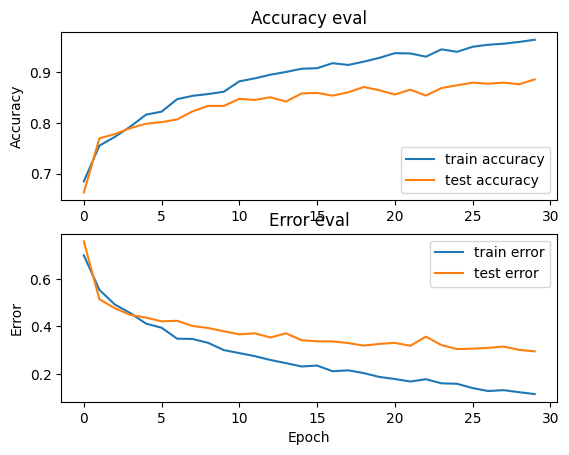

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)
plot_history(history)

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

49/49 - 0s - 10ms/step - accuracy: 0.8924 - loss: 0.2865

Test accuracy: 0.8923766613006592


In [18]:
def predict(model, X, y):

    
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    
    prediction = model.predict(X)

    
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


In [19]:
X_to_predict = X_test[100]
y_to_predict = y_test[100]


predict(model, X_to_predict, y_to_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
Target: 1, Predicted label: [0]


In [20]:
model.save("/kaggle/working/cnn_asvspoof_2021.h5")

# Test ASVspoof2019

In [21]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import librosa
import os
import math
import shutil
import pandas as pd
from tensorflow.keras.models import load_model
import tensorflow as tf
def predict_voice(model, audio_file_path, genre_mapping):

    
    signal, sample_rate = librosa.load(audio_file_path, sr=22050)

    
    mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, n_fft=2048, hop_length=512)
    mfcc = mfcc.T

    mfcc = np.resize(mfcc, (130, 13, 1))

    mfcc = mfcc[np.newaxis, ...]

   
    prediction = model.predict(mfcc)
    predicted_index = np.argmax(prediction, axis=1)

    
    genre_label = genre_mapping[predicted_index[0]]
    print("Raw prediction:", prediction)

    return genre_label

In [22]:
bonifide_folder_dir = "/kaggle/input/asvspoof2021-df-audio-dataset/DF_audio/bonafide"
bonifide_files = [os.path.join(bonifide_folder_dir, f) for f in os.listdir(bonifide_folder_dir) if f.endswith('.flac')]

In [25]:
spoofed_folder_dir = "/kaggle/input/asvspoof2021-df-audio-dataset/DF_audio/spoofed"
spoofed_files = [os.path.join(spoofed_folder_dir, f) for f in os.listdir(spoofed_folder_dir) if f.endswith('.flac')]
spoofed_files = np.random.choice(spoofed_files, size=1000, replace=True)

In [23]:
bonifide_files = np.random.choice(bonifide_files, size=1000, replace=True)

In [27]:
model_path = '/kaggle/working/cnn_asvspoof_2021.h5'

model = load_model(model_path)
count = 0
data_length = len(spoofed_files) * 2
for path in spoofed_files:
    genre_mapping = {0: "bonafide", 1: "spoof"}
    predicted_voice = predict_voice(model, path, genre_mapping)
    if predicted_voice == "spoof":
        count += 1

for path in bonifide_files:
    genre_mapping = {0: "bonafide", 1: "spoof"}
    predicted_voice = predict_voice(model, path, genre_mapping)
    if predicted_voice == "bonafide":
        count += 1
accuracy = np.round(count/data_length, decimals=2)
print(f"Dự đoán chính xác {count}/{data_length}. Accuracy: ")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
Raw prediction: [[0.03671062 0.9632894 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Raw prediction: [[0.8529651  0.14703494]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Raw prediction: [[0.8644409  0.13555914]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Raw prediction: [[0.0514935  0.94850653]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Raw prediction: [[0.19229376 0.8077062 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Raw prediction: [[0.00772592 0.9922741 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Raw prediction: [[0.02724235 0.9727577 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Raw prediction: [[0.00949869 0.9905013 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Raw prediction: [[0.0150878  0.98491216]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Raw prediction: [[0.21035819 0.7896418 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Raw prediction: [[0.31591266 0.68408734]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Raw prediction: [[0.02453855 0.9754615 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R